# Premier League Data Analysis
## Machine Learning Data Cleaning and Feature Selection




## Overview
The Premier League is one of the biggest soccer leagues in the world which takes place in the United Kingdom. Having over 10 million viewer EACH gameday, the stats and insights of a game play a vital role among individuals. Aiming to check the quality of the data, this notebook has used various methods to answer the questions.

##Dataset

The dataset consists of various characteristics and match statistics of football teams in the Premier League. These include:

Independent Variables: These are the features based on which analyses are conducted. They can include various match statistics such as the number of corners, fouls, shots on goal, possession percentage, pass accuracy, and other relevant metrics. Additional details might include team-specific data, manager information, and other relevant match details.

Dependent Variable: The key outcome or response variable in this dataset is the Score of a match. This represents the number of goals scored by a team in a single match.

Range of Score: The Score variable can range from 0 (indicating no goals scored) to higher values that represent the number of goals scored by a team. The exact range can be determined by exploring the dataset.

Total Observations: The dataset contains a total of  observations (or matches), each providing detailed statistics and scores.

This dataset can be used for various analyses, including predicting match outcomes, understanding the factors that contribute to a team's success, or exploring trends and patterns in team performances across the Premier League.

Link to the dataset: https://www.kaggle.com/datasets/ekrembayar/premier-league-match-reports-20192020

In [2]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=c7ac7513cc679470615ac94a5a296197f9bc2e304d01a7e385ec7719da241df3
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

### 1. Data Types Analysis
Q1) What are the data types?
Identify if the data types are numeric or categorical.

In [31]:
import pandas as pd


file_path = "https://raw.githubusercontent.com/chinm4y/csv/main/premierLeague%20-%20Sheet1.csv"
data = pd.read_csv(file_path)

#Checking datatypes
data.dtypes

Match_Name          object
Match_Date          object
Team                object
Team_Logo           object
Manager             object
Captain             object
Score                int64
Penalties            int64
Fouls                int64
Corners              int64
Crosses              int64
Touches              int64
Tackles              int64
Interceptions        int64
Aerials Won          int64
Clearances           int64
Offsides             int64
Goal Kicks           int64
Throw Ins            int64
Long Balls           int64
YellowCard           int64
RedCard              int64
YellowRed            int64
Possession         float64
PassingAccuracy      int64
SucPass              int64
NumofPass            int64
ShotsAccuracy      float64
SucShots             int64
NumofShots           int64
SavesAccuracy      float64
SucSaves             int64
NumofSaves           int64
dtype: object

### 2. Missing Values Analysis
Q2) Missing values?
Check for any missing values in the dataset.

In [32]:
data.isnull().sum()

Match_Name         0
Match_Date         0
Team               0
Team_Logo          0
Manager            0
Captain            0
Score              0
Penalties          0
Fouls              0
Corners            0
Crosses            0
Touches            0
Tackles            0
Interceptions      0
Aerials Won        0
Clearances         0
Offsides           0
Goal Kicks         0
Throw Ins          0
Long Balls         0
YellowCard         0
RedCard            0
YellowRed          0
Possession         0
PassingAccuracy    0
SucPass            0
NumofPass          0
ShotsAccuracy      0
SucShots           0
NumofShots         0
SavesAccuracy      0
SucSaves           0
NumofSaves         0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

### 3. Distribution Analysis of Numeric Variables
Analyze the distributions of numeric variables.

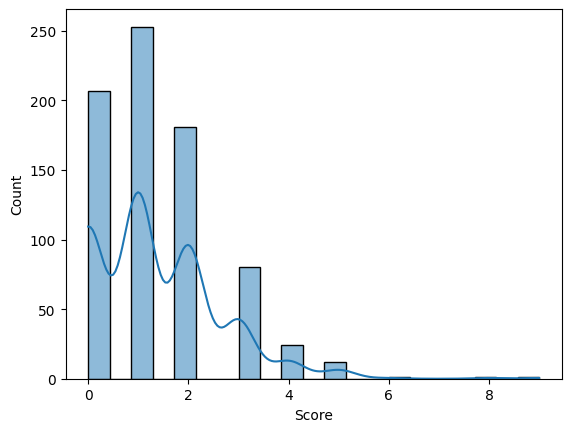

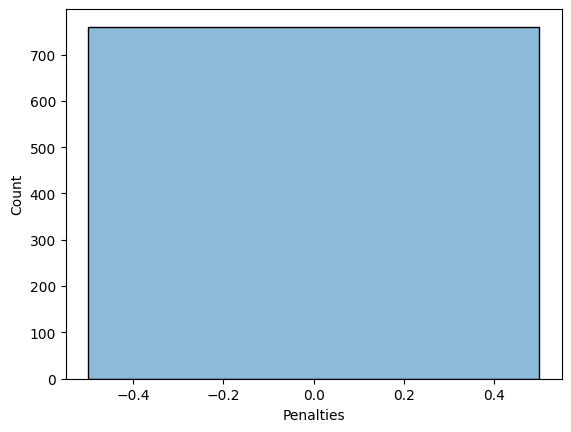

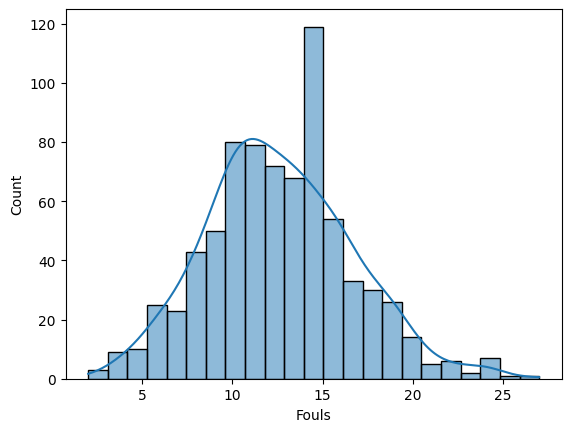

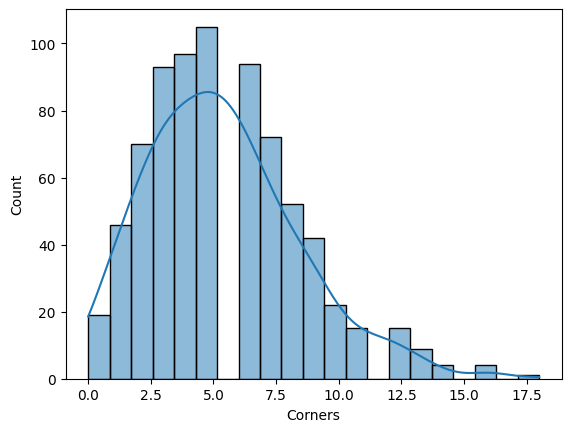

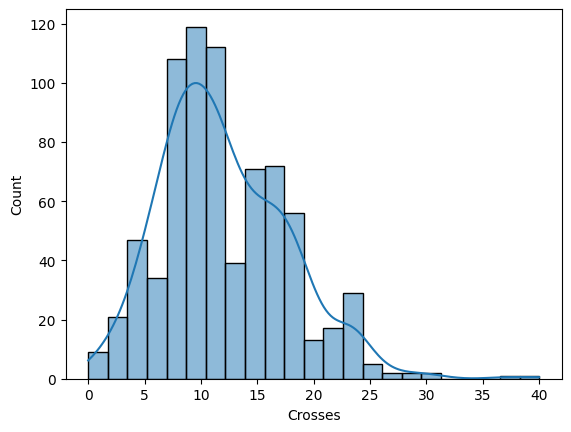

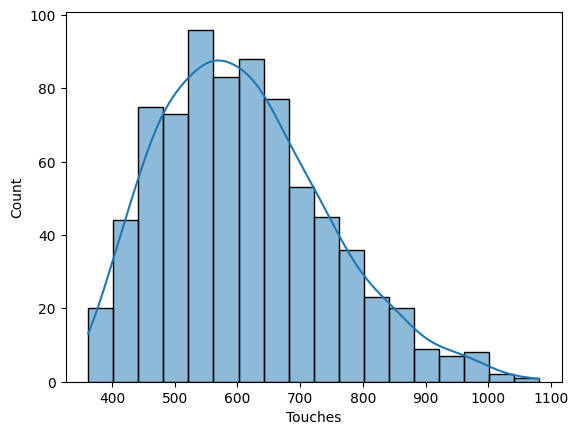

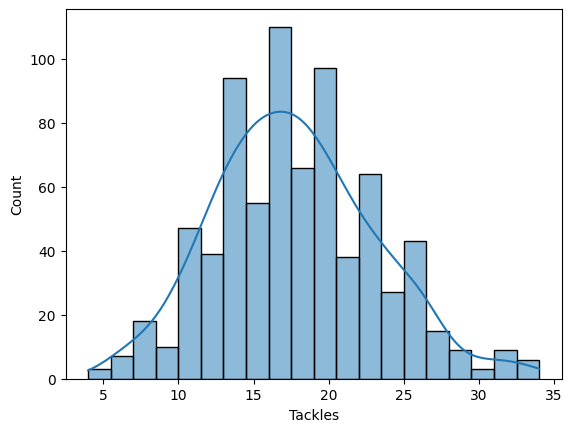

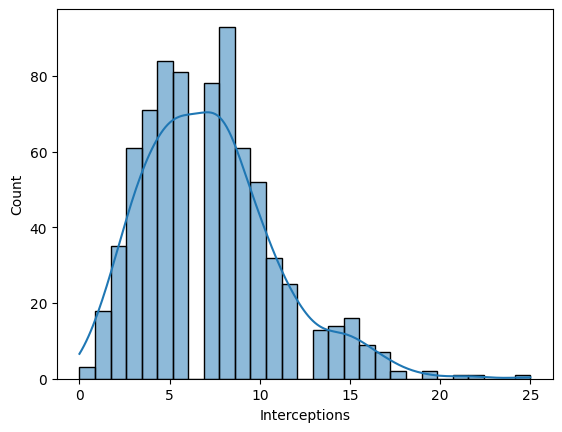

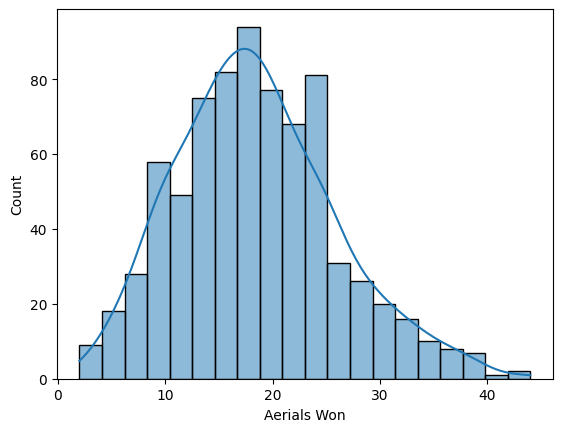

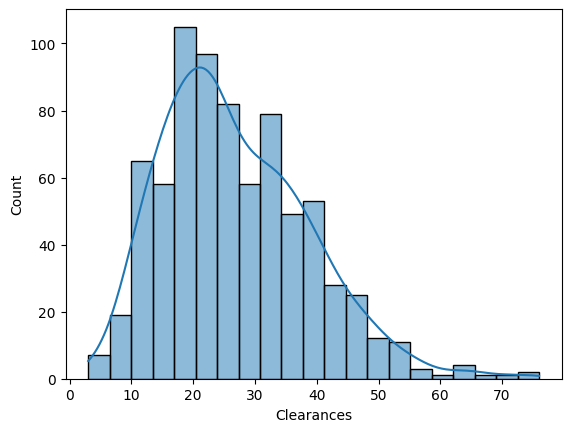

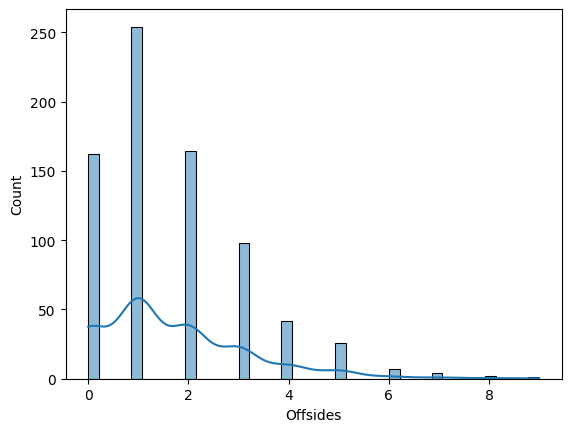

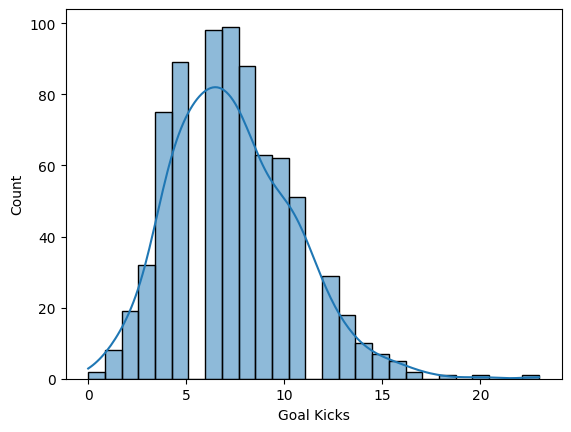

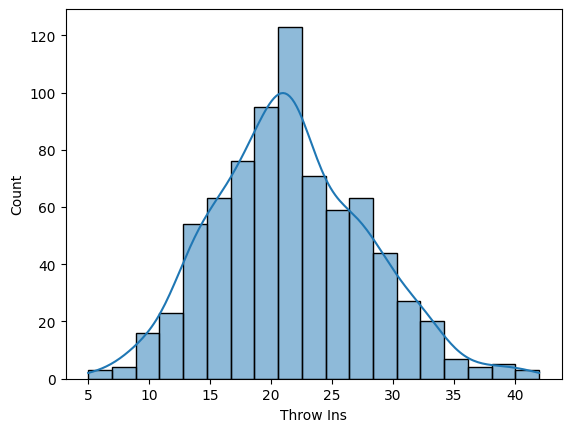

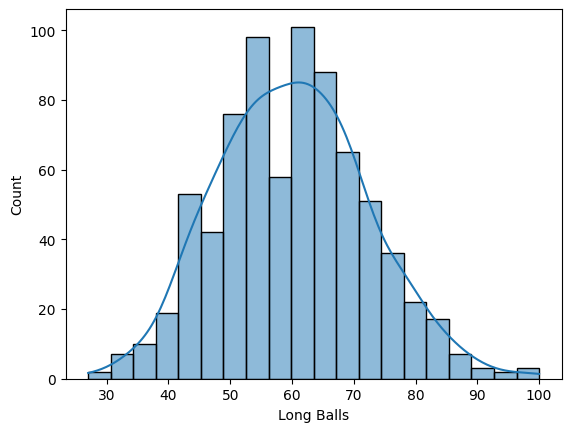

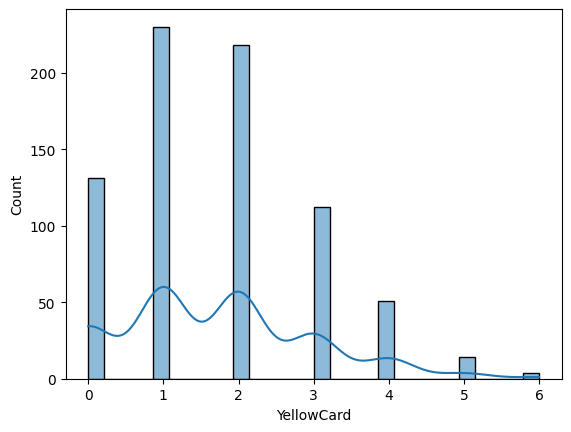

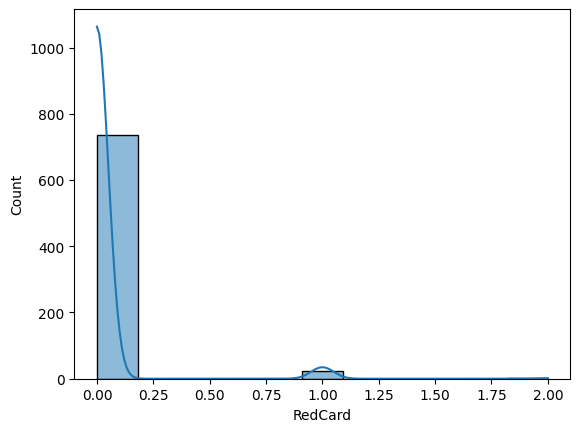

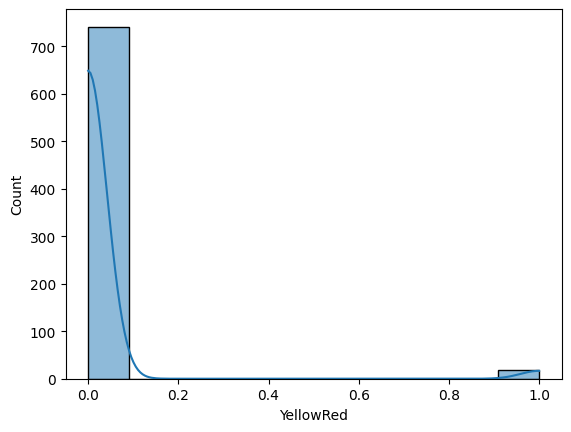

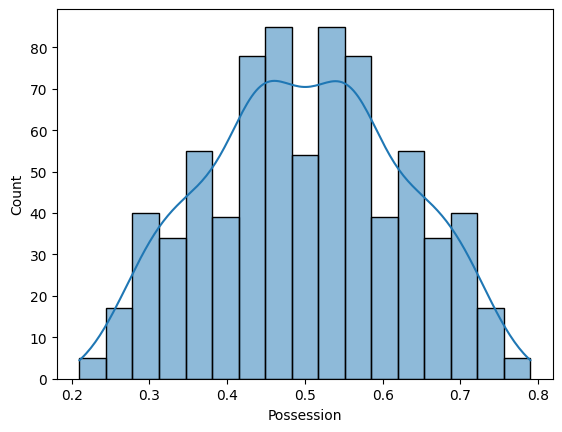

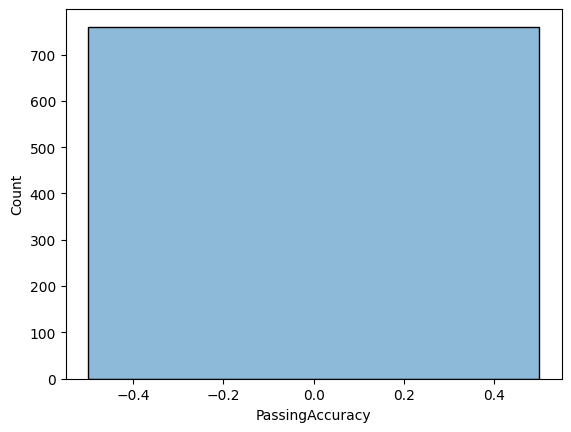

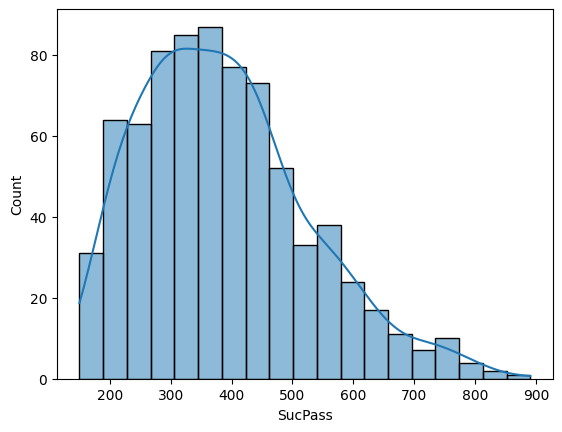

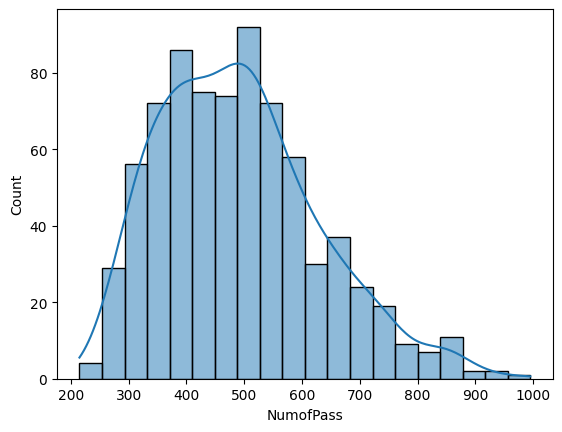

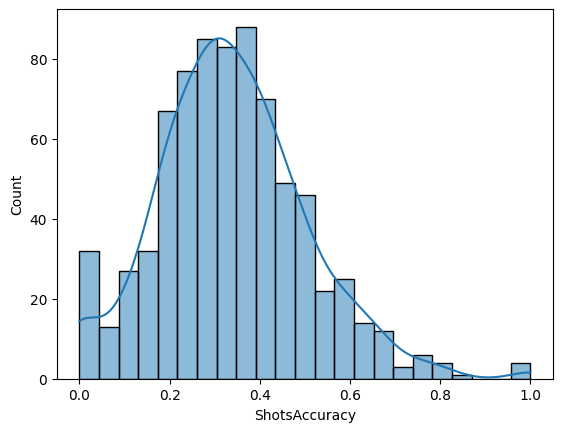

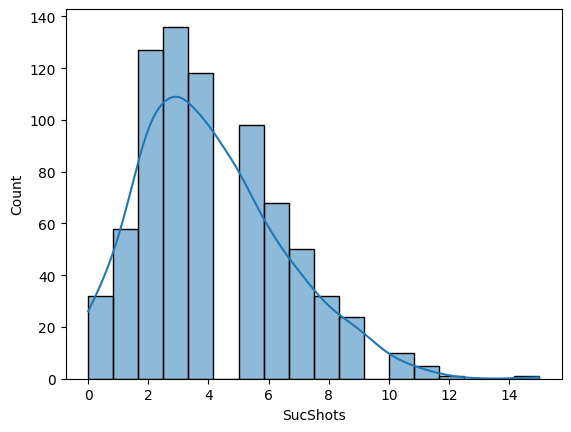

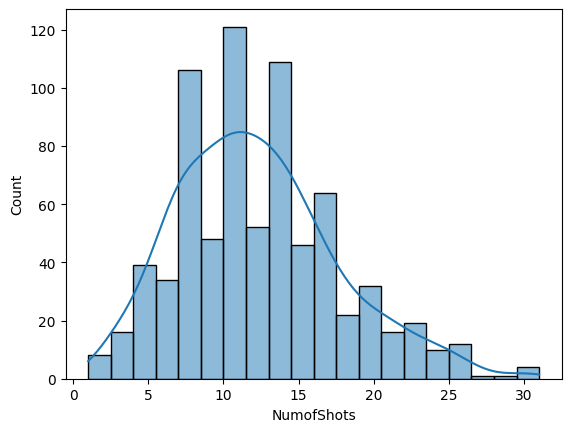

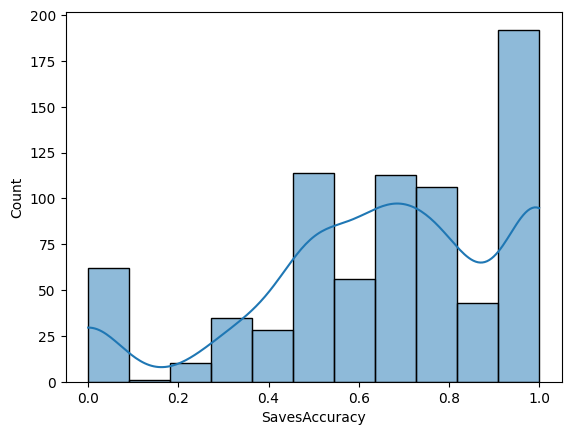

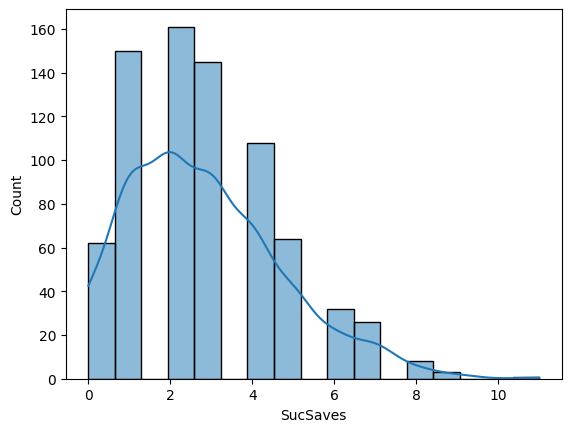

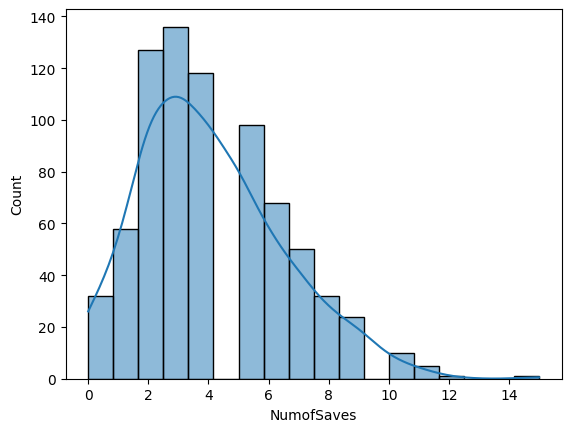

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
df_numeric = data.select_dtypes(include=['int64', 'float64'])

# Plot distributions
for column in df_numeric.columns:
    sns.histplot(df_numeric[column], kde=True)
    plt.show()

Analyzing specific data which is 'Corners', 'Fouls', 'Possession', 'ShotsAccuracy', 'SucShots' and using a qplot for better understanding


<Figure size 800x500 with 0 Axes>

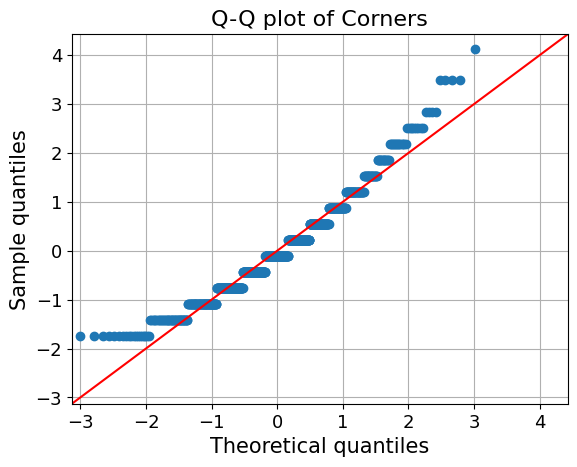

<Figure size 800x500 with 0 Axes>

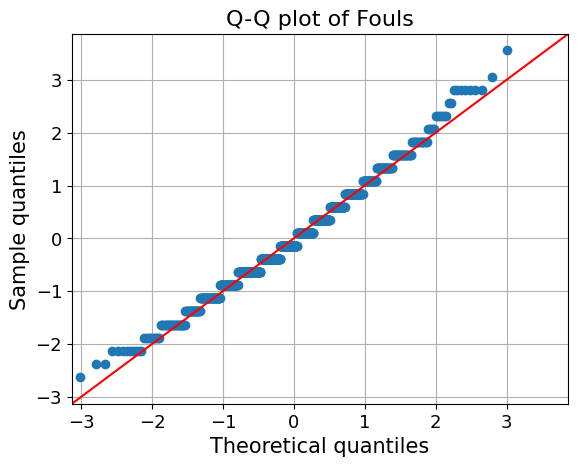

<Figure size 800x500 with 0 Axes>

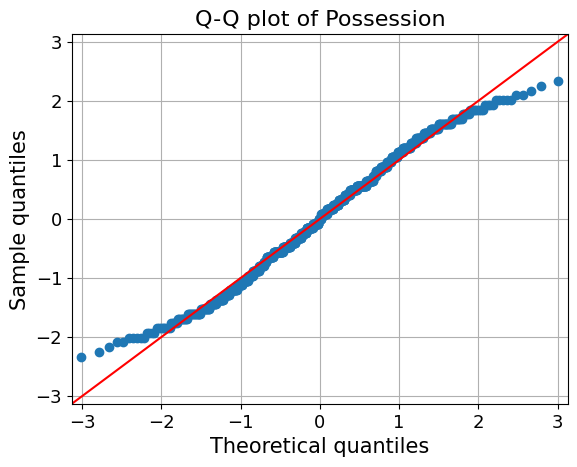

<Figure size 800x500 with 0 Axes>

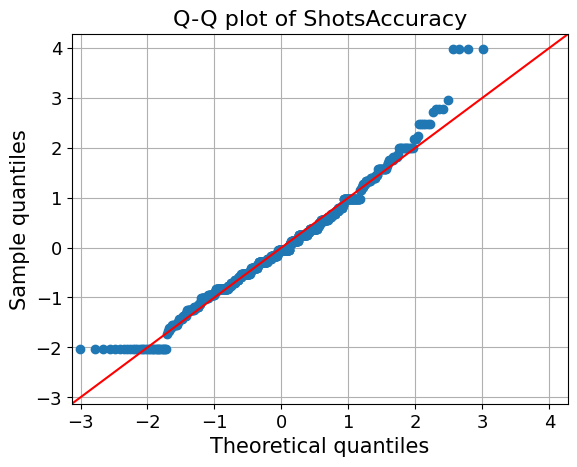

<Figure size 800x500 with 0 Axes>

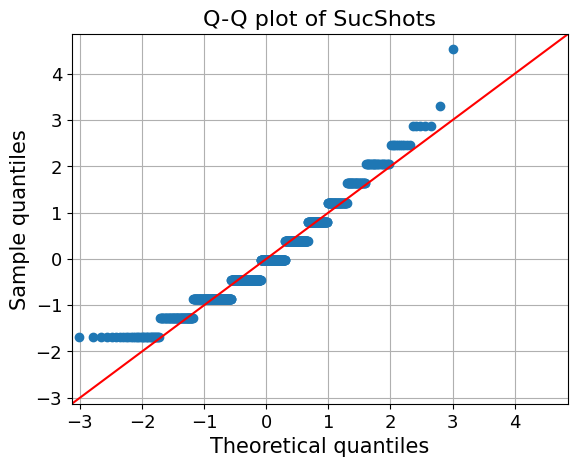

In [8]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt


data_norm = data[
    ['Corners', 'Fouls', 'Possession', 'ShotsAccuracy', 'SucShots']  # Add other numeric features as needed
]

# Plotting Q-Q plots for the selected features
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()


Q3) What are the likely distributions?
Answer:

Q-Q plot above shows that all independent variables are following normal
distribution (almost roughly)

Below is a histogram plot to check the density of integer data types

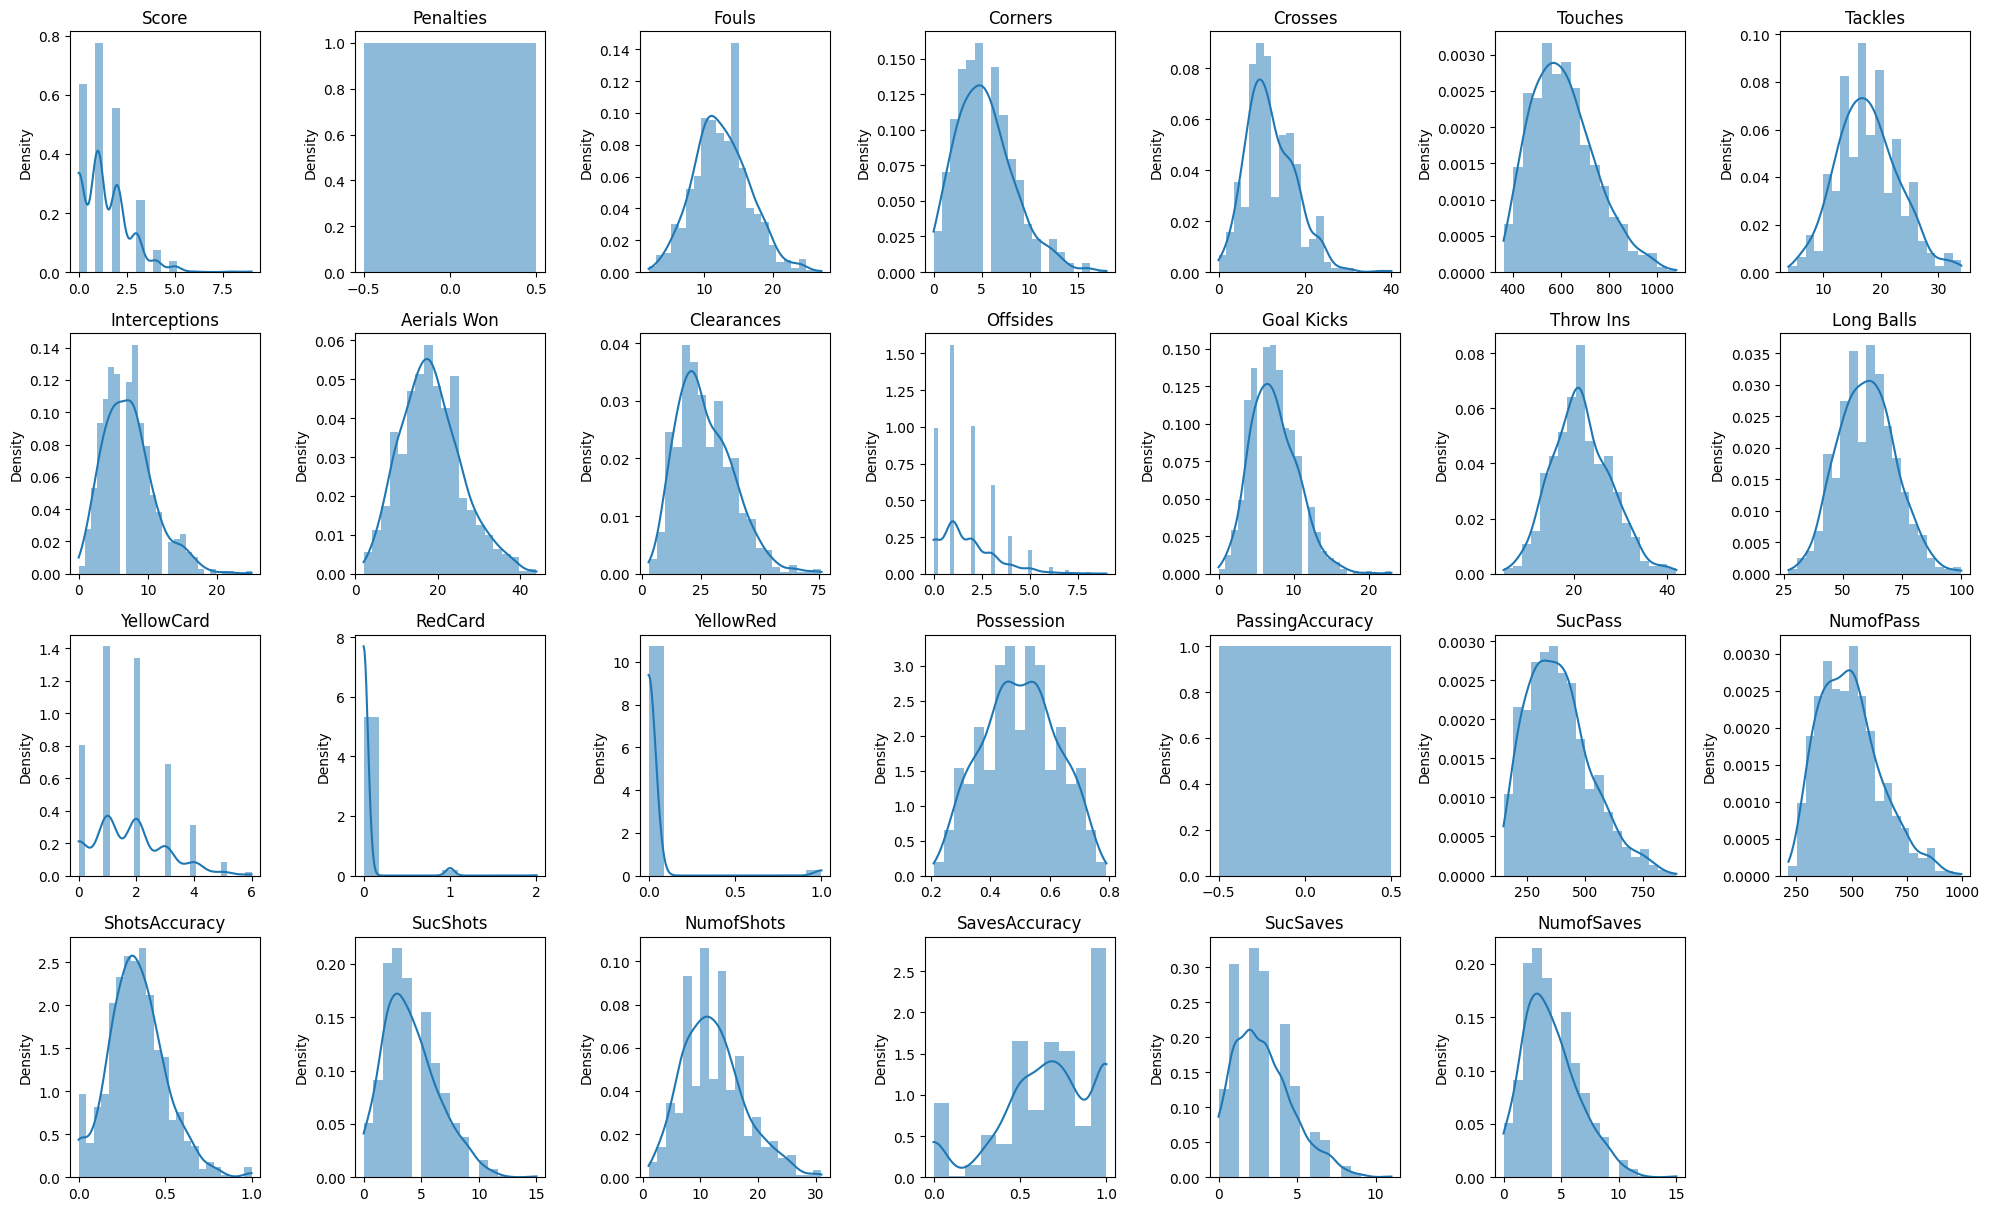

In [9]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 7, i + 1)
    sns.histplot(data[col], kde=True, stat="density", linewidth=0)
    plt.title(col)
    plt.xlabel('')
    plt.tight_layout()
plt.show()


Heatmap for high correlation

<ipython-input-10-53b75c055129>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

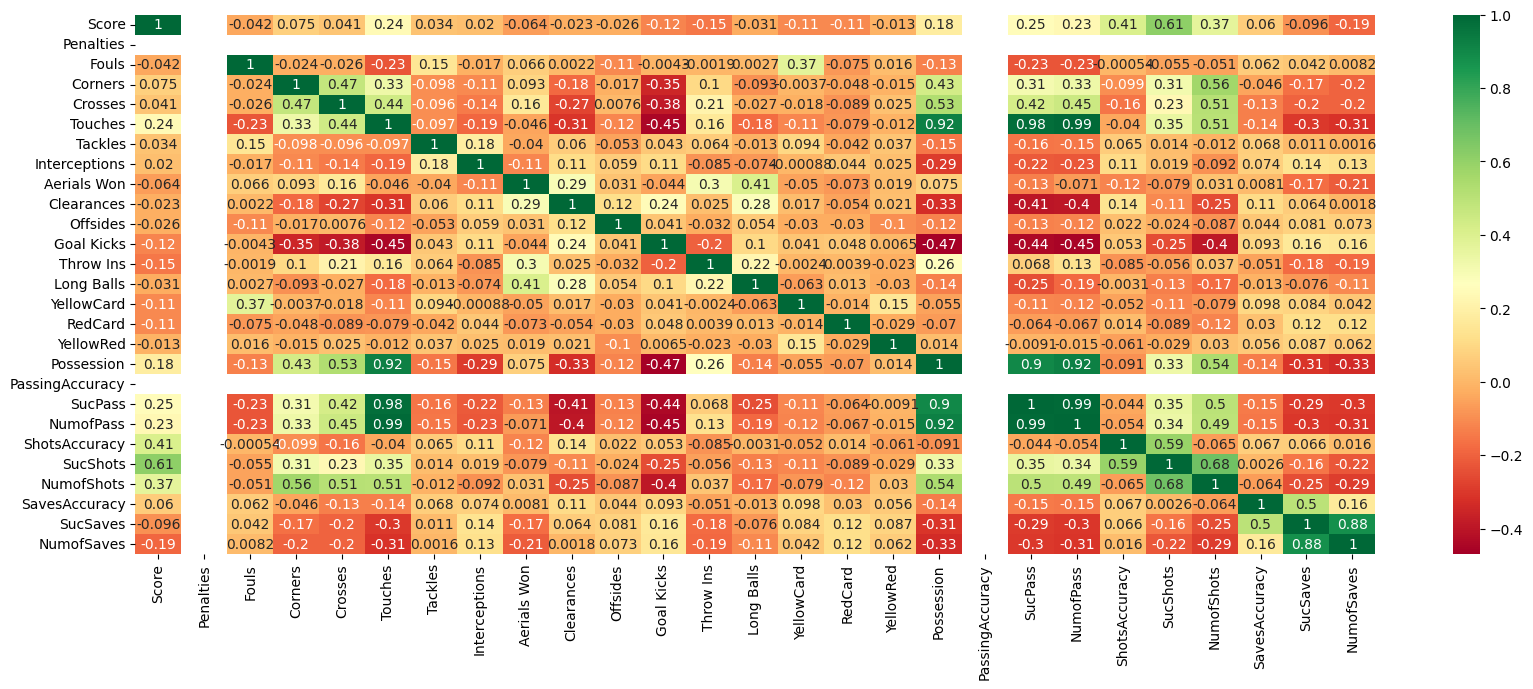

In [10]:
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

"We can see there are a lot of correlations among the variables in the Premier League dataset. The correlation between 'ShotsAccuracy' and 'SucShots' being particularly high, it may indicate that both variables are essentially measuring or predicting the same aspect of a team's performance in a match. This suggests a strong relationship between a team's accuracy in shooting and the number of successful shots they make."

In [11]:
correlation_matrix = data.corr()
score_correlation = correlation_matrix['Score'].sort_values(ascending=False)



<ipython-input-11-32b36959e11f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


### 4. Feature Selection
Determine the usefulness of independent variables for predicting a target variable using various methods.

In [12]:
data = pd.get_dummies(data)
from sklearn import preprocessing

# Creating x to store scaled values as floats
x = data[["Score"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transforming the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Running  the normalizer on the dataframe
data[["Score"]] = pd.DataFrame(x_scaled)


In [13]:
data.head()

,Score,Penalties,Fouls,Corners,Crosses,Touches,Tackles,Interceptions,Aerials Won,Clearances,...,Captain_Steve Cook,Captain_Séamus Coleman,Captain_Timm Klose,Captain_Toby Alderweireld,Captain_Troy Deeney,Captain_Tyrone Mings,Captain_Virgil van Dijk,Captain_Wes Morgan,Captain_Willian,Captain_Étienne Capoue
0,0.444444,0,10,11,15,633,24,11,14,5,...,0,0,0,0,0,0,0,0,0,0
1,0.111111,0,12,2,5,537,17,10,4,31,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,11,1,10,531,18,4,16,18,...,0,0,0,0,0,0,0,0,0,0
3,0.555556,0,15,1,8,678,26,5,16,27,...,0,0,0,0,0,0,0,0,0,0
4,0.333333,0,6,2,7,500,22,9,30,64,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import statsmodels.api as sm


independent_vars = [
    'Corners', 'YellowCard', 'RedCard', 'YellowRed', 'Possession',
    'ShotsAccuracy', 'SucShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves'

]

# Adding a constant to the model
X = sm.add_constant(data[independent_vars])
y = data['Score']

#Fitting the OLS model
model = sm.OLS(y, X).fit()

#Printing out the summary statistics of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     52.34
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.57e-79
Time:                        21:38:42   Log-Likelihood:                 633.76
No. Observations:                 760   AIC:                            -1246.
Df Residuals:                     749   BIC:                            -1195.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0600      0.027      2.196      0.028       0.006       0.114
Corners          -0.0060      0.001     -4.030      0.000      -0.009      -0.003
YellowCard       -0.0053      0.003     -1.680      0.093      -0.011       0.001
RedCard          -0.0415      0.021     -2.016      0.044      -0.082      -0.001
YellowRed         0.0061      0.025      0.244      0.807      -0.043       0.055
Possession        0.0204      0.038      0.540      0.590      -0.054       0.094
ShotsAccuracy     0.0289      0.032      0.890      0.374      -0.035       0.093
SucShots          0.0336      0.002     13.782      0.000       0.029       0.038
SavesAccuracy    -0.0112      0.020     -0.547      0.585      -0.051       0.029
SucSaves          0.0191      0.006      2.979      0.003       0.007       0.032
NumofSaves       -0.0172      0.005     -3.807      0.000      -0.026      -0.008
==============================================================================
Omnibus:                       53.942   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.554
Skew:                           0.575   Prob(JB):                     6.47e-17
Kurtosis:                       4.015   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the significant value of 0.06 because predicting if the match is a winning match or a loosing match is not that critical,
1. The corners have the p walve of 0 which is less and hence it is a significant feature.
2. yellow cards have the p value of 0.09 which is more  and hence they are cnsidered to be not a significant feature
3. red cards have the p value of 0.04, a significant feature
4. yellow+red have the p value 0.8, not a significant feature.
5. possession has the p value of 0.5, not a significant feature.
6. successfull shots has the p value of 0 which is very less and is a significant feature.
7. same can be said aboout succ saves, num of saves and shot accuracy.

### 5. Analysis of Missing Data in Independent Variables
Identify and quantify missing data in independent variables.

In [35]:
data.isnull().sum()

Match_Name         0
Match_Date         0
Team               0
Team_Logo          0
Manager            0
Captain            0
Score              0
Penalties          0
Fouls              0
Corners            0
Crosses            0
Touches            0
Tackles            0
Interceptions      0
Aerials Won        0
Clearances         0
Offsides           0
Goal Kicks         0
Throw Ins          0
Long Balls         0
YellowCard         0
RedCard            0
YellowRed          0
Possession         0
PassingAccuracy    0
SucPass            0
NumofPass          0
ShotsAccuracy      0
SucShots           0
NumofShots         0
SavesAccuracy      0
SucSaves           0
NumofSaves         0
dtype: int64

No null values.

##Training, Validating and Test Splitting

In [36]:
from sklearn.model_selection import train_test_split

#selecting features
features = [
    'Corners', 'YellowCard', 'RedCard', 'YellowRed', 'Possession',
    'ShotsAccuracy', 'SucShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves'
    # Add or remove features based on your analysis
]

X = data[features]
y = data['Score']

# Splitting data into Training 76.5%, Validation set 13.5% and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


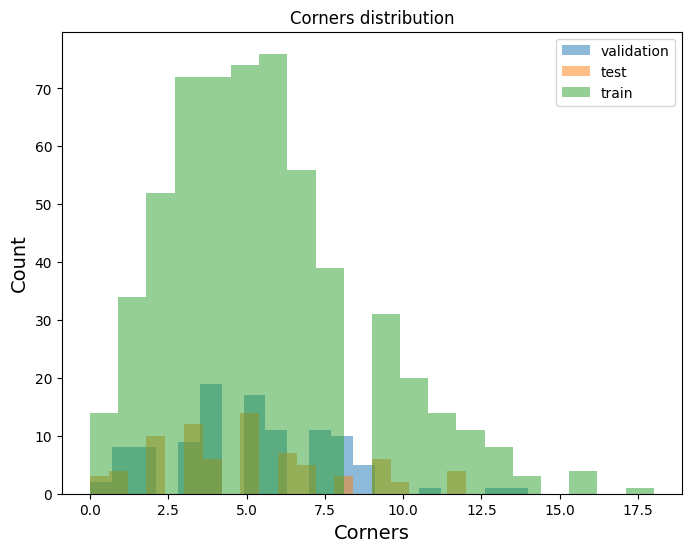

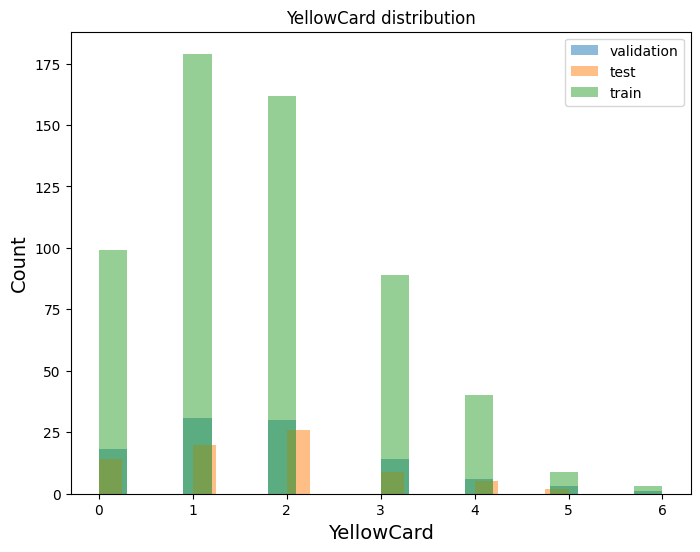

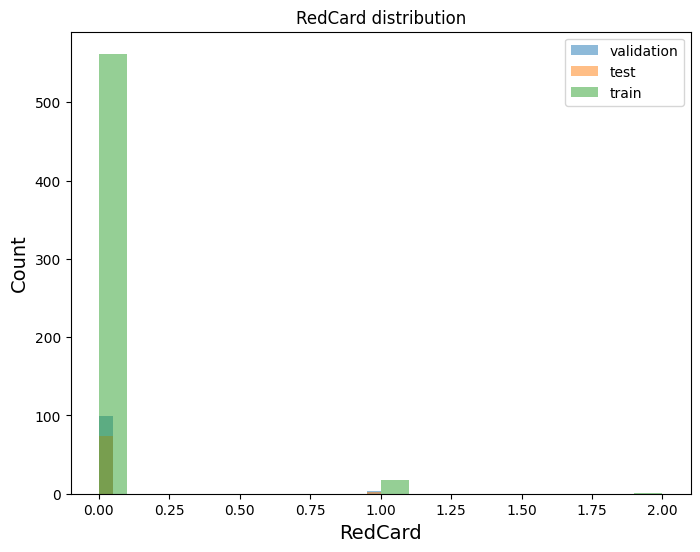

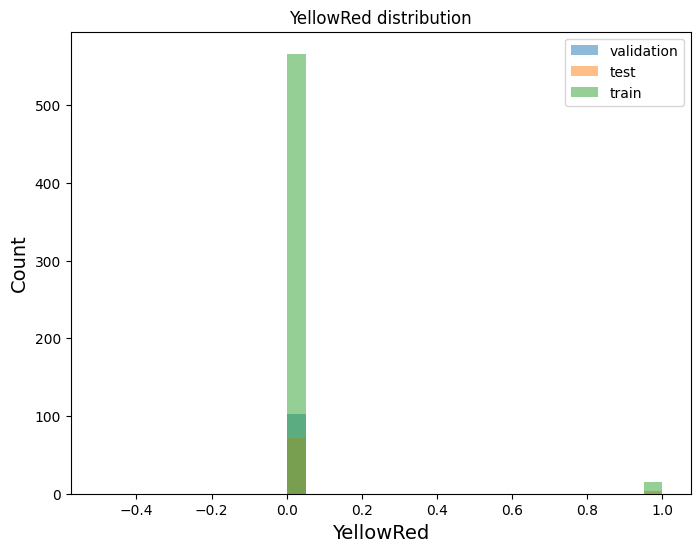

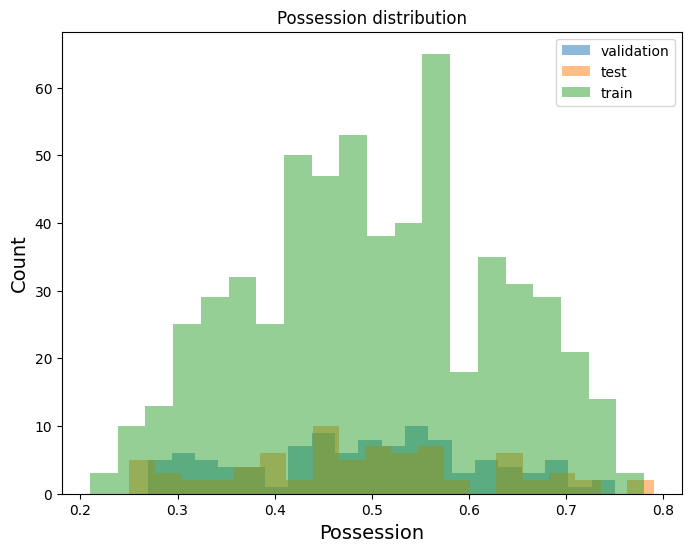

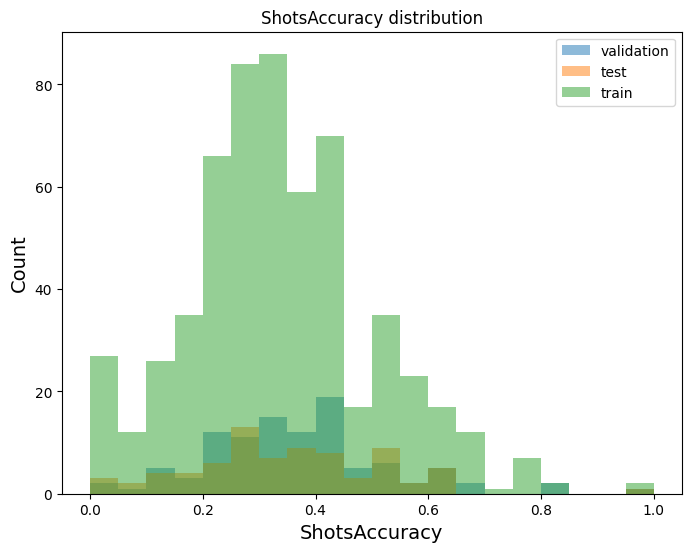

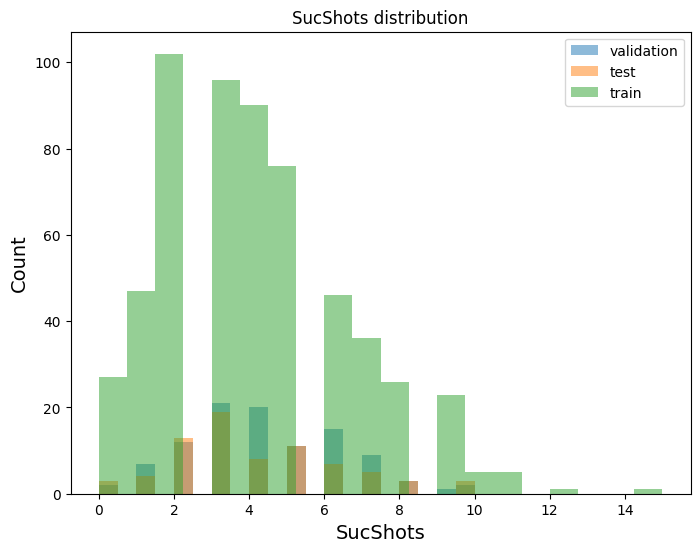

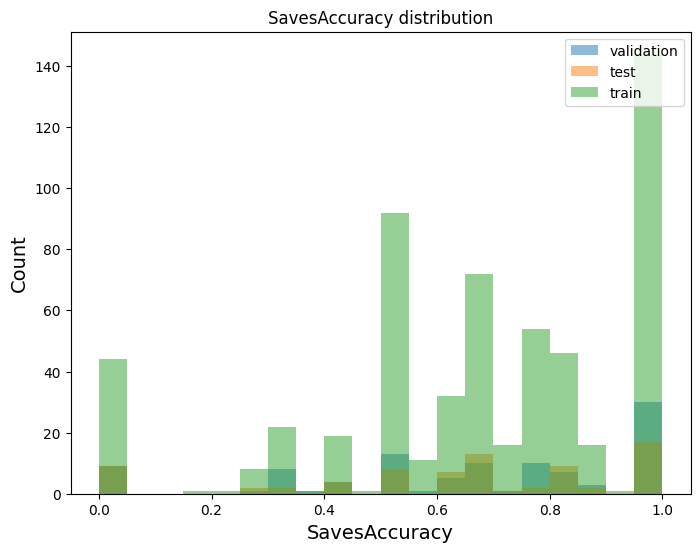

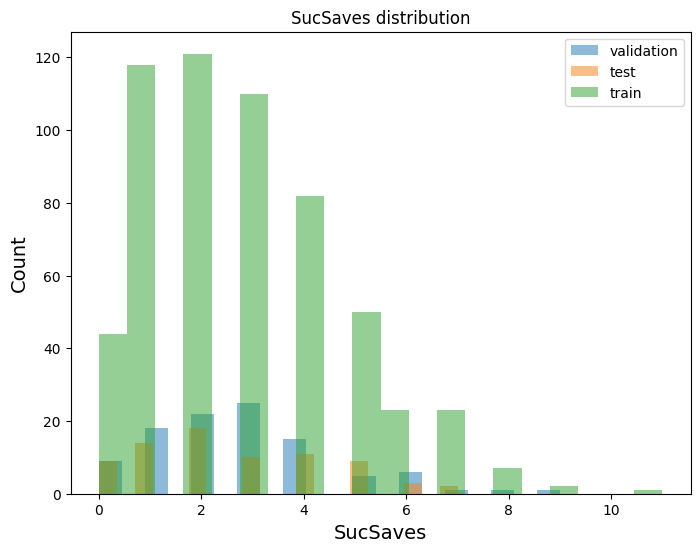

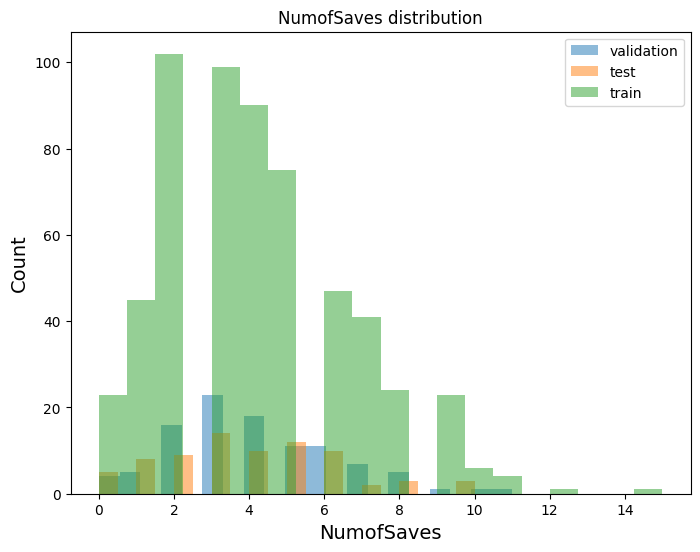

In [19]:
import matplotlib.pyplot as plt


features = [
    'Corners', 'YellowCard', 'RedCard', 'YellowRed', 'Possession',
    'ShotsAccuracy', 'SucShots', 'SavesAccuracy', 'SucSaves', 'NumofSaves'
    # Add or remove features based on your analysis
]

# Creating subsets for plotting
X_test_plot = X_test[features]
X_val_plot = X_val[features]
X_train_plot = X_train[features]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()




The allocation of the dataset into training, testing, and validation sets appears appropriate. However, it's important to note that a few specific data points, particularly at the boundaries, seem to be absent in the test and validation sets for variables like 'ShotsAccuracy', 'Possession', 'SavesAccuracy', 'SucSaves', 'NumofSaves', 'Corners', 'YellowCard', 'Fouls', 'RedCard', and 'YellowRed'. This suggests that these particular data values may not be fully included in those subsets.

It's worth highlighting that the categorical variables within the dataset do not have any missing values, ensuring their consistent presence across all partitions of the data.

Linear Regression

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [22]:
# Creating linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

Predictions >

In [23]:
# Making predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.01
Coefficient of determination: 0.44
R^2 score on tarining set = 0.43733494853141397


In [24]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.01
Coefficient of determination: 0.36
R^2 score on test set = 0.3622743736045092


In [25]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.01
Coefficient of determination: 0.24
R^2 score on validation set = 0.24109802292922144


Feature understanding

In [26]:
#Feature understanding
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.7114 ± 0.1866,SucShots
0.2436 ± 0.0395,NumofSaves
0.1022 ± 0.0854,SucSaves
0.0697 ± 0.0454,Corners
0.0211 ± 0.0269,RedCard
0.0056 ± 0.0095,ShotsAccuracy
-0.0002 ± 0.0002,SavesAccuracy
-0.0005 ± 0.0057,YellowRed
-0.0082 ± 0.0139,Possession
-0.0144 ± 0.0308,YellowCard


##Answers to the questions:

* Which independent variables are useful to predict a target (dependent variable)?
<br>A:
Below is the rank of the dependent variables
1. 'Corners',
2. 'YellowCard',
3. 'RedCard',
4. 'YellowRed',
5. 'Possession',
6. 'ShotsAccuracy',
7. 'SucShots',
8. 'SavesAccuracy',
9. 'SucSaves',
10. 'NumofSaves'
<br>
* Which independent variables have missing data? How much?
<br>A:
No independent variables have any missing data or zeros.

* Do the training and test sets have the same data?
<br>A:
Yes, the training, test, and validation sets in the Premier League dataset predominantly consist of similar data. However, the training set encompasses a greater number of data points, and it is observed that certain extreme or boundary values found in the complete dataset might not be represented in the training and validation sets.


* In the predictor variables independent of all the other predictor variables?
<br>A:
No, they are not independet of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map



* Which predictor variables are the most important in the Premier League dataset?
<br>
A:
1. ShotsAccuracy (The most important of them all)
2. Possession
3. SavesAccuracy
4. SucSaves
5. NumofSaves
6. Corners
7. YellowCard
8. Fouls
9. RedCard
10. YellowRed




* Do the ranges of the predictor variables make sense in the Premier League dataset?
<br>A:
1. For variables like 'ShotsAccuracy', 'Possession', 'SavesAccuracy', 'SucSaves', 'NumofSaves', 'Corners', 'YellowCard', 'Fouls', 'RedCard', and 'YellowRed', there are expected variations and ranges that align with typical football match statistics.
2. Some values in these variables might be small or close to zero, which is sensible, as these statistics can vary widely from one match to another, and low values can indicate specific match conditions.
3. 'Score' values generally range from 0 (indicating no goals scored) to higher values representing the number of goals scored by a team in a match. The range makes sense in the context of football scores.

* What are the distributions of the predictor variables?
<br>A:
1. Based on the Q-Q plots, it appears that most of the numeric independent variables approximately follow a normal distribution.

2. The categorical variables in the dataset, such as team names, might have different distributions, and they are not represented in the Q-Q plots.





## Conclusion
In the analysis of the Premier League dataset, it's clear that there is a significant presence of multicollinearity among the variables. This indicates strong correlations between two or more of the independent variables, potentially affecting the reliability of statistical conclusions. With the exception of 'length,' all other variables in the dataset demonstrate statistical significance, suggesting their substantial influence on the studied outcomes and their importance in understanding Premier League dynamics. These insights underscore the need for future analyses to address the effects of multicollinearity and to concentrate on the significant variables, in order to gain more precise and insightful understanding of the league's patterns and performances.

##References:
Sckit learn offcial documentation
Refered Towards Data Science
Eli5 official documentation
The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation